## Part Time Data Science 07 class: Phase 1 Project
### Project by: Nicholas Kirui
### Date of Submission: 03 June 2024

## Project Overview
For this project, I will use exploratory data analysis to generate insights for a business stakeholder based on datasets provided.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data Understanding
The data was collected from various locations and the different files have different formats. 
1. compressed CSV (comma-separated values) files:
       - bom.movie_gross
       - tn.movie_budgets
       - tmdb.movies
2. TSV (tab-separated values) files:
       - rt.movie_info.tsv
       - rt.reviews.tsv
3. Data located in a SQLite database:
    - im.db  
    - entiry relationship diagram: movie_data_erd
    - Table Names
        - movie_basics
        - directors
        - known_for
        - movie_akas
        - movie_ratings
        - persons
        - principals
        - writers

    - Most relevant tables:
        - ## Movie_basics
            - Table contains the basic information of the movies including the genres
        - ## movie_ratings
            - Table shows the ratings of the movies

______________________________________________________________________________________________________________________________________________________________

### Data preparation
- Import the necessary libraries
- Initial exploratory data analysis of all the datasets

In [1]:
import os
import sqlite3
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## Explore the in.db sqlite database
- Read the sqlite database using pandas dataframe
- use queries to get data from the relevant tables

In [2]:
im_path = os.path.join('im.db')

# Open up a connection
conn = sqlite3.connect(im_path)
# Initialize a cursor
cursor = conn.cursor()

In [3]:
table_name_query = """SELECT name
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
movie_basics_query = ''' 

SELECT *
FROM movie_basics

'''

# Use the line below to check your query's output
pd.read_sql(movie_basics_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:

movie_ratings_query = ''' 

SELECT *
FROM movie_ratings

'''

# Use the line below to check your query's output
pd.read_sql(movie_ratings_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
pd.read_sql(movie_ratings_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
pd.read_sql(movie_basics_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
top_20_genres = pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(20)
top_20_genres

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

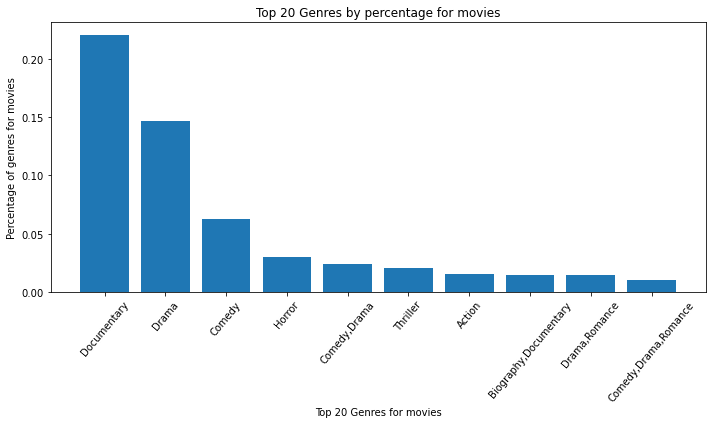

In [10]:
# Top twenty genres

fig, ax = plt.subplots(figsize=(10, 6))

top_20_genres = (pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(10)/ len(pd.read_sql(movie_basics_query, conn)))

plt.bar(x=top_20_genres.index,
        height=top_20_genres.values
)
plt.xticks(rotation=50)
ax.set_xlabel('Top 20 Genres for movies'),
ax.set_ylabel('Percentage of genres for movies');
ax.set_title('Top 20 Genres by percentage for movies')

plt.tight_layout()

### Explore the bom.movie_gross.csv file:
1. Read the bom.movie_gross.csv
2. Determine the different data types

In [11]:
# create a pandas movie_gross_df 
# read the bom.movie_gross.csv file into the movie_gross_df
# open the movie_gross_df
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
